# PROYECTO-PREDICCIÓN DE PRECIOS DE VIVIENDAS #

# 1.Importación de Librerías #

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.pipeline import make_pipeline


# 2.Carga de datasets #

In [2]:
#Carga de datasets train y test
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

#Datasets train y test combinados
combined_df = pd.concat([train_df,test_df], axis=0)

# 3.Análisis exploratorio de datos #

## 3.1Dataset train ##

In [3]:
#Listar las 5 primeras filas del dataset train
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Forma del dataset train
train_df.shape

(1460, 81)

In [5]:
#Información del dataset train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Tipo de datos del dataset train
train_dtype = train_df.dtypes
train_dtype.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
#Valores nulos del dataset train
train_df.isnull().sum().sort_values(ascending= False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

## 3.2 Dataset test ##


In [8]:
#Listar las 5 primeras filas del dataset test
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
#Forma del dataset test
test_df.shape


(1459, 80)

In [10]:
#Información del dataset test
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
#Tipo de datos del dataset test
test_dtype = test_df.dtypes
test_dtype.value_counts()


object     43
int64      26
float64    11
Name: count, dtype: int64

In [12]:
#Valores nulos del dataset test
test_df.isnull().sum().sort_values(ascending= False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

## 3.3 Comparación de los datasets Train y Test ##

3.3.1 Comparación de tipos de datos 

In [13]:
#Como la columna "SalePrice" no está disponible en el dataset test, lo eliminaremos.
trn_dtype = train_dtype.drop('SalePrice')
trn_dtype.compare(test_dtype)

,self,other
BsmtFinSF1,int64,float64
BsmtFinSF2,int64,float64
BsmtUnfSF,int64,float64
TotalBsmtSF,int64,float64
BsmtFullBath,int64,float64
BsmtHalfBath,int64,float64
GarageCars,int64,float64
GarageArea,int64,float64


3.3.2 Comparación de valores nulos de los datasets

In [14]:
null_train = train_df.isnull().sum()
null_test = test_df.isnull().sum()
null_train = null_train.drop('SalePrice')
null_comp_df = null_train.compare(null_test).sort_values(['self'],ascending = [False])
null_comp_df  

,self,other
PoolQC,1453.0,1456.0
MiscFeature,1406.0,1408.0
Alley,1369.0,1352.0
Fence,1179.0,1169.0
MasVnrType,872.0,894.0
FireplaceQu,690.0,730.0
LotFrontage,259.0,227.0
GarageYrBlt,81.0,78.0
GarageFinish,81.0,78.0
GarageCond,81.0,78.0


3.3.3 Comparación de distribución


In [15]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(train_df[col].unique()) < 25 and col not in ['Id']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['Id']]
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of discrete features : ",len(categorical_features))

Total Number of Numerical Columns :  38
Number of discrete features :  18
No of continuous features are :  19
Number of discrete features :  43


## 3.4 Encontrar el valor adecuado para los valores faltantes - Numérico ##

3.4.1 Valor medio de relleno

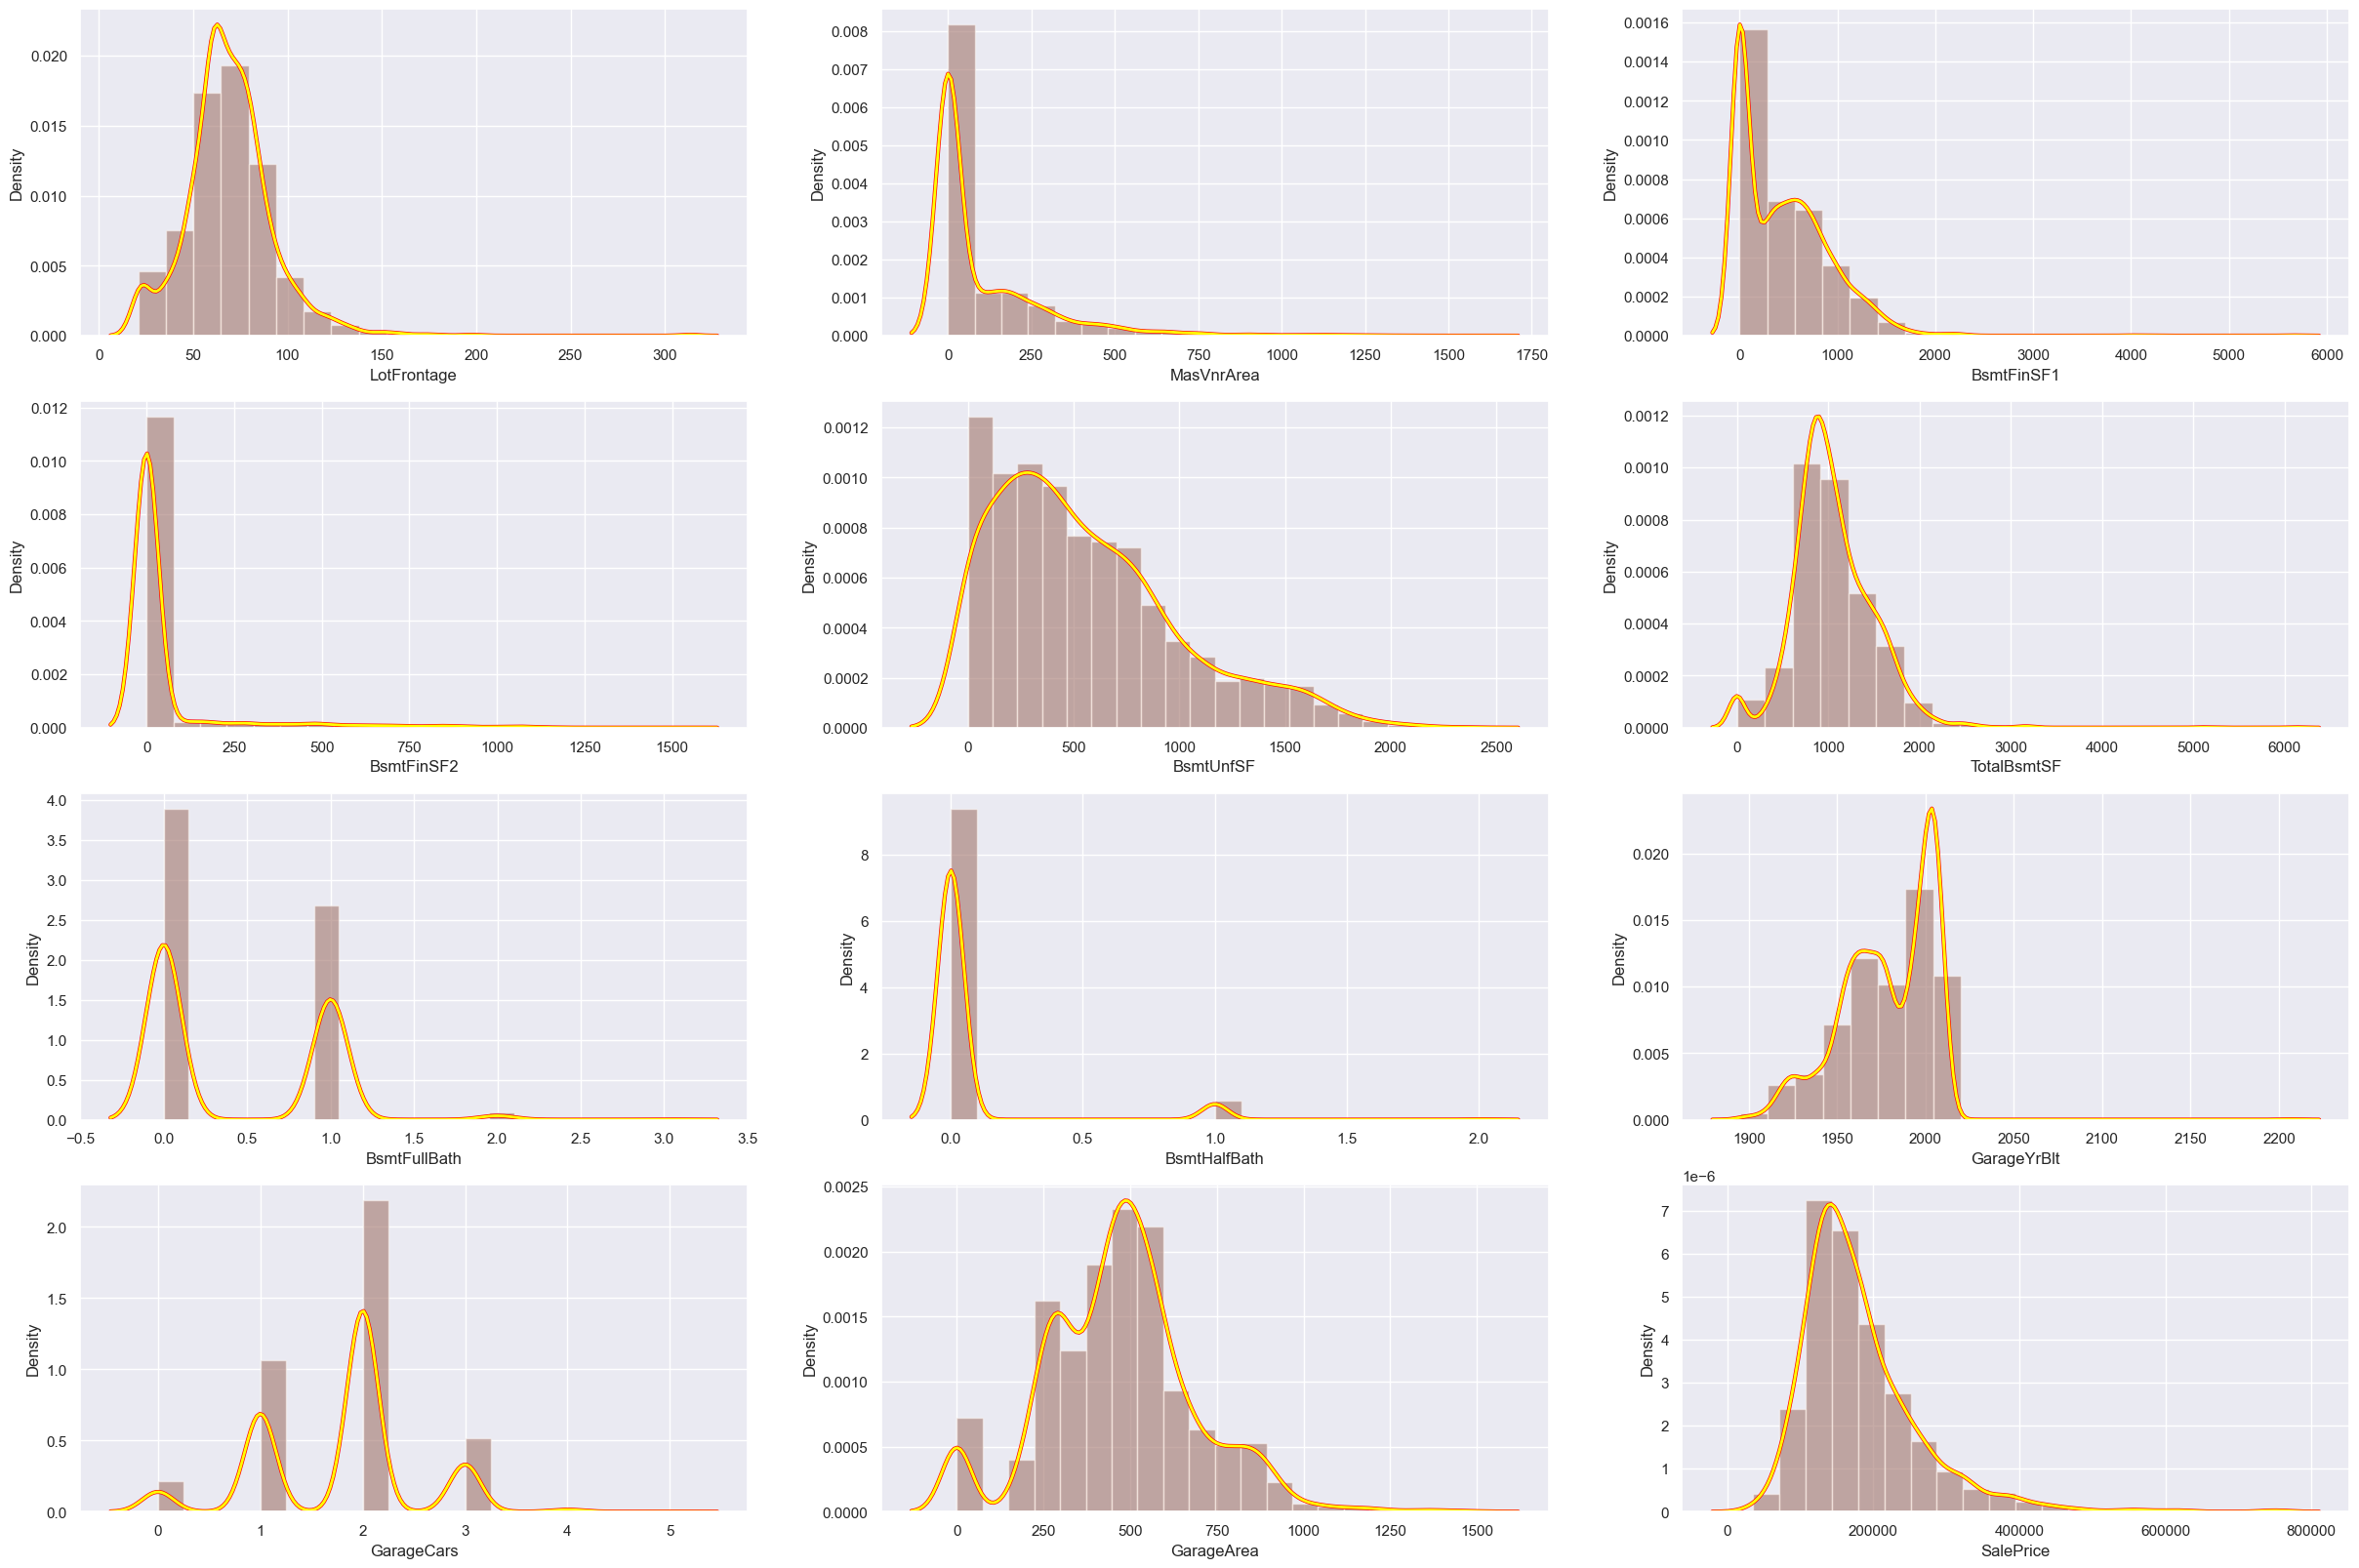

In [16]:
#Verificar la distribución normal de las columnas que tienen valores nulos al completarlas con el valor medio
null_features_numerical = [col for col in combined_df.columns if combined_df[col].isnull().sum() > 0 and col not in categorical_features]
plt.figure(figsize=(30,20))
sns.set()

warnings.simplefilter("ignore")
for i,var in enumerate(null_features_numerical):
  plt.subplot(4,3,i+1)
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':2,'color':'yellow'},label="mean")

3.4.2 Rellenar valor medio

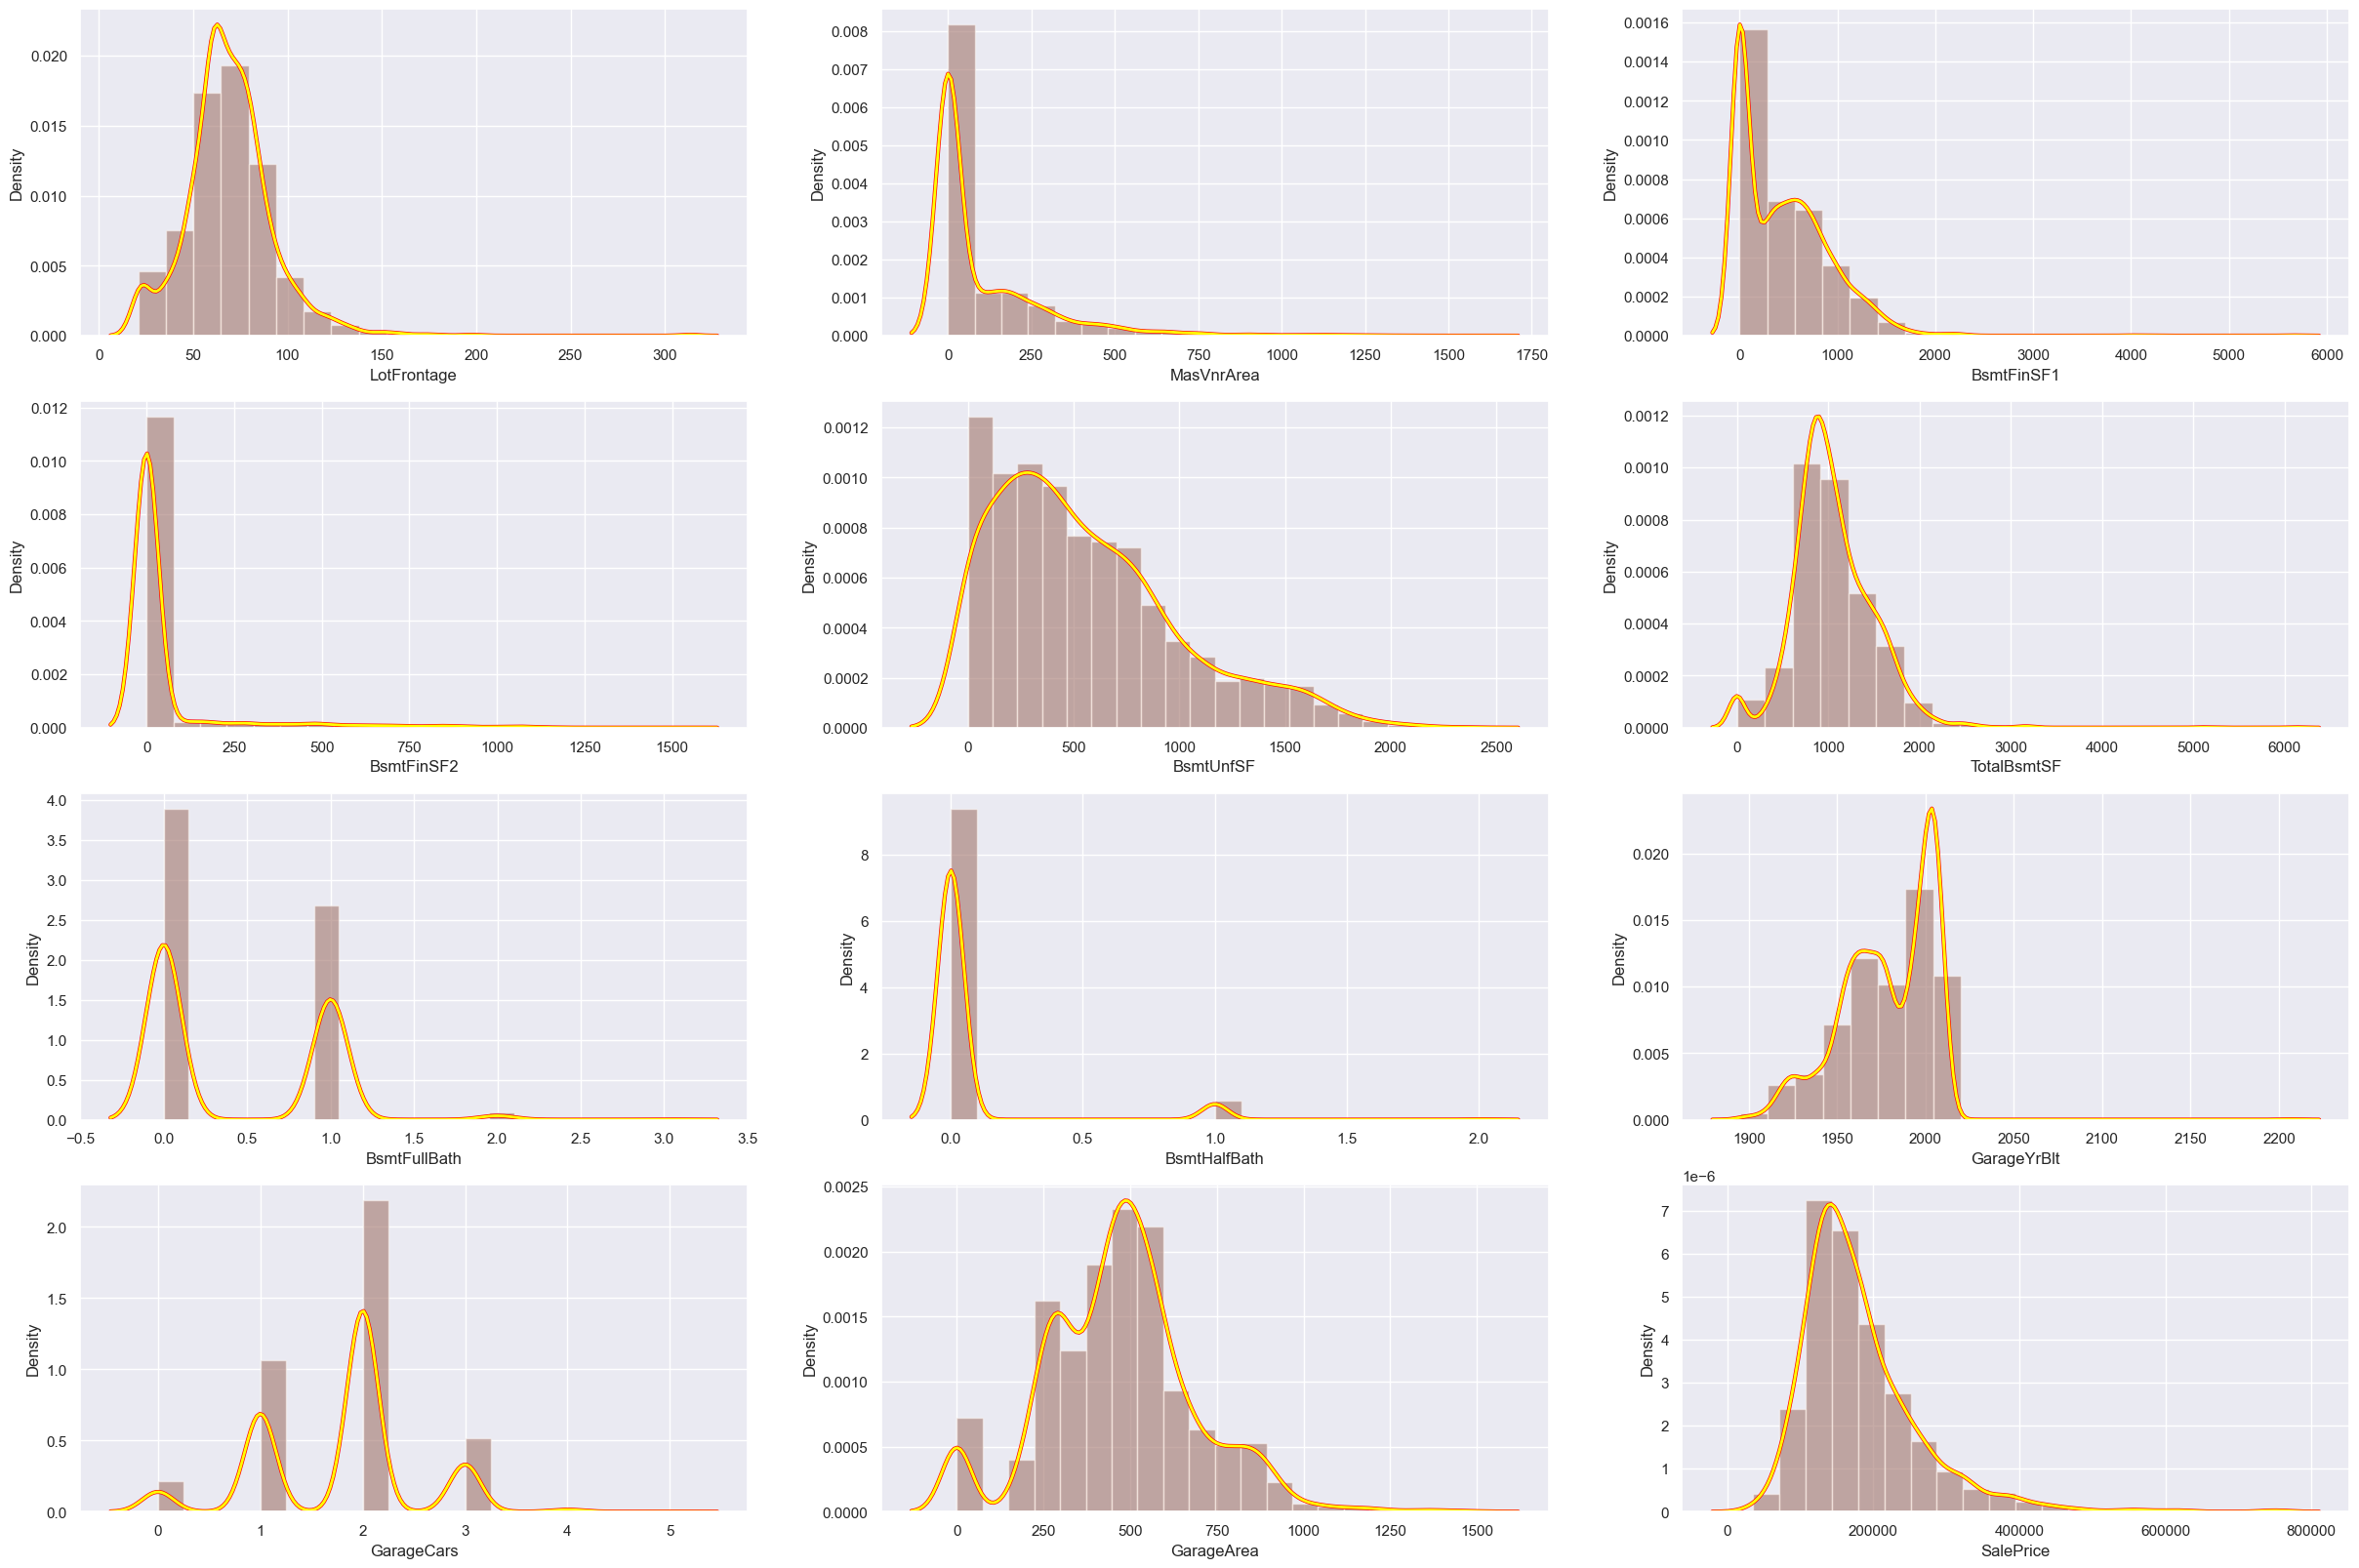

In [17]:
plt.figure(figsize=(30,20))
sns.set()
warnings.simplefilter("ignore")
for i,var in enumerate(null_features_numerical):
  plt.subplot(4,3,i+1)
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':2,'color':'yellow'},label="median")

## 3.5 Análisis de variables temporales ##

In [18]:
#Variables que contienen información del año
year_feature = [col for col in combined_df.columns if 'Yr' in col or 'Year' in col]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House price vs YearSold')

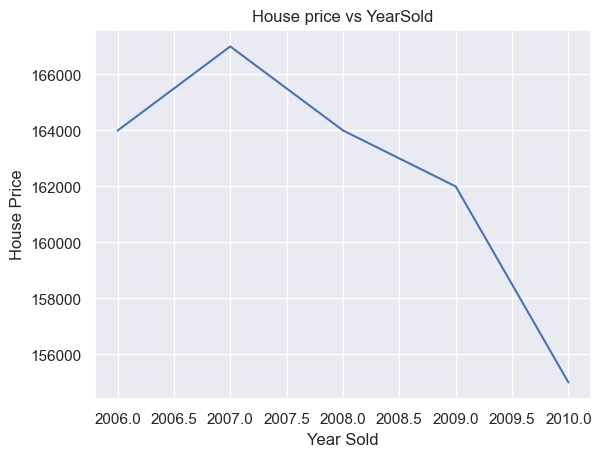

In [19]:
#Verificar si existe una relación entre los campos "Year Sold" y "Sales price"
combined_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.title('House price vs YearSold')

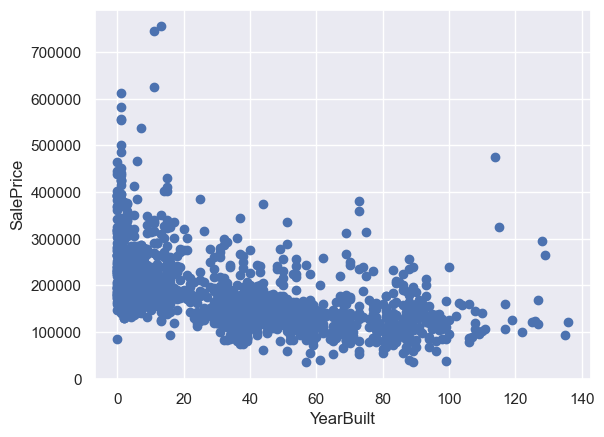

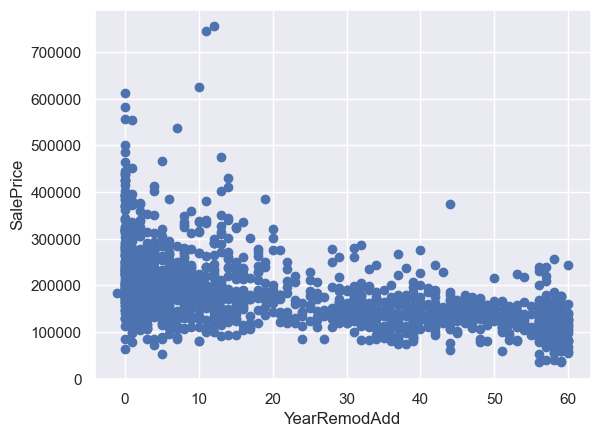

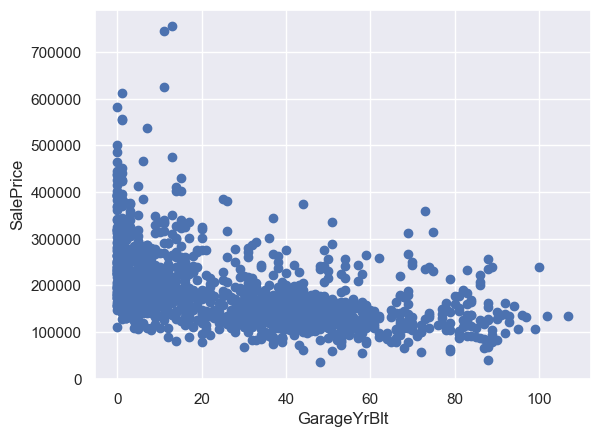

In [20]:
#Aquí veremos cómo las variables temporales (Year features) afectan al precio de la vivienda.
for fet in year_feature:
  if fet != 'YrSold':
    hs = combined_df.copy()
    hs[fet] = hs['YrSold'] - hs[fet]
    plt.scatter(hs[fet],hs['SalePrice'])
    plt.xlabel(fet)
    plt.ylabel('SalePrice')
    plt.show()

## 3.6 Correlación de datos ##

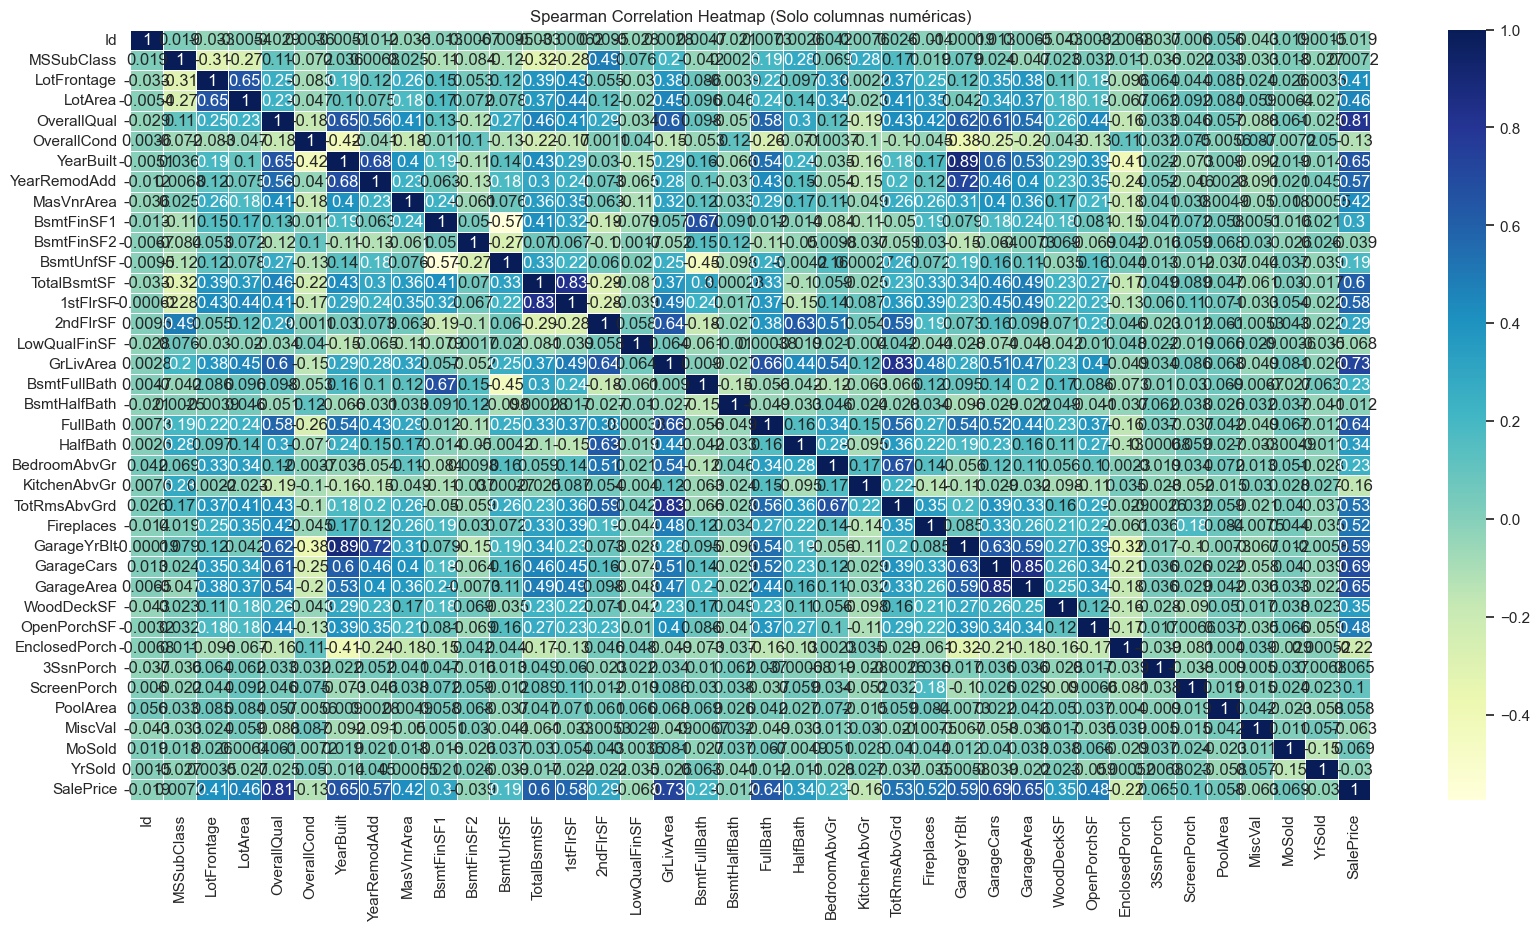

In [21]:
# Seleccionar solo las columnas numéricas
numeric_df = train_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación con método 'spearman'
training_corr = numeric_df.corr(method='spearman')

# Graficar el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(training_corr, cmap="YlGnBu", linewidths=0.5, annot=True)
plt.title("Spearman Correlation Heatmap (Solo columnas numéricas)")
plt.show()

# 4. Feature Engineering #


## 4.1 Eliminación de columnas ##

In [22]:

drop_columns = ["Id", "Alley", "Fence", "LotFrontage", "FireplaceQu", "PoolArea", "LowQualFinSF", "3SsnPorch", "MiscVal", 'RoofMatl','Street','Condition2','Utilities','Heating','Label']
# Eliminar Columnas
print("Number of columns before dropping : ",len(combined_df.columns))
print("Number of dropping columns : ",len(drop_columns))
combined_df.drop(columns=drop_columns, inplace=True, errors='ignore')
print("Number of columns after dropping : ",len(combined_df.columns))

Number of columns before dropping :  81
Number of dropping columns :  15
Number of columns after dropping :  67


## 4.2 Cambio de variable temporal ##

In [23]:
# Variables temporales (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:

    combined_df[feature]=combined_df['YrSold']-combined_df[feature]

combined_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## 4.3 Completar valores faltantes ##


### 4.3.1 Característica numérica ###

In [24]:
for col in null_features_numerical:
  if col not in drop_columns:    
    combined_df[col] = combined_df[col].fillna(0.0)

### 4.3.2 Característica categórica ###

In [25]:
null_features_categorical = [col for col in combined_df.columns if combined_df[col].isnull().sum() > 0 and col in categorical_features]
cat_feature_mode = ["SaleType", "Exterior1st", "Exterior2nd", "KitchenQual", "Electrical", "Functional"]

for col in null_features_categorical:
  if col != 'MSZoning' and col not in cat_feature_mode:
    combined_df[col] = combined_df[col].fillna('NA')
  else:
    combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0])

### 4.4 Convertir característica numérica a categórica ###

In [26]:
convert_list = ['MSSubClass']
for col in convert_list:
  combined_df[col] = combined_df[col].astype('str')

## 4.5 Aplicar PowerTransformer a las columnas ##

In [30]:
#Obtener las características excepto los tipo objetos
numeric_feats = combined_df.dtypes[combined_df.dtypes != 'object'].index

#Comprobar la desviación de todas las características numéricas
skewed_feats = combined_df[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
print(skewness_df.head(10))


 Skew in numberical features: 

                    Skew
LotArea        12.822431
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
1stFlrSF        1.469604


In [33]:
#Aplicar PowerTransformer a las columnas
log_list = ['BsmtUnfSF', 'LotArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

for col in log_list:
    power = PowerTransformer(method='yeo-johnson', standardize=True)
    combined_df[[col]] = power.fit_transform(combined_df[[col]]) 

print('Number of skewed numerical features got transform : ', len(log_list))

Number of skewed numerical features got transform :  6


## 4.6 Reagrupar características ##

In [34]:
#Reagrupar características
regroup_dict = {
    'HeatingQC':['Fa','Po'],
    'GarageQual':['Fa','Po'],
    'GarageCond':['Fa','Po'],
}
 
for col, regroup_value in regroup_dict.items():
    mask = combined_df[col].isin(regroup_value)
    combined_df[col][mask] = 'Other'

## 4.7 Codificación de características categóricas ##

### 4.7.1 Get-Dummies ###

In [35]:
# Generar columnas ficticias one-hot
combined_df = pd.get_dummies(combined_df).reset_index(drop=True)

In [36]:
new_train_data = combined_df.iloc[:len(train_df), :]
new_test_data = combined_df.iloc[len(train_df):, :]
X_train = new_train_data.drop('SalePrice', axis=1)
y_train = np.log1p(new_train_data['SalePrice'].values.ravel())
X_test = new_test_data.drop('SalePrice', axis=1)

In [39]:
pre_precessing_pipeline = make_pipeline(RobustScaler())

X_train = pre_precessing_pipeline.fit_transform(X_train)
X_test = pre_precessing_pipeline.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1460, 269)
(1459, 269)
